In [1]:
# predict keras model
# https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras

In [14]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
model_predict = load_model('007_traffic_lights_classifier_basenet_sgd_epoch25.h5')

In [16]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01) # original
model_predict.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# helper functions

# Min-Max scaling for grayscale image data
# http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling
def normalize_scale(X):
    a = 0
    b = 1.0
    return a + X * (b-a) / 255

# http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html
def standardize(X):
    X -= np.mean(X, axis = 0) # zero-center
    X /= np.std(X, axis = 0) # normalize
    return (X)

# preprocessing pipeline
def prepare_data(X):
    
    # step 1: convert to gray image
    #X = rgb2gray(X)
    
    # add the dimensions again in order for working with LeNet
    X = np.reshape(X, (X.shape[0],32,32,-1))
    
    # Step 2: Normalize RGB-values into interval [-1,1]    
    X = normalize_scale(X)

    # Step 3: Convert data to values with zero mean and std = 1
    X = standardize(X)
    return X

In [ ]:
https://stackoverflow.com/questions/44156974/how-to-interpret-keras-predict-generator-output
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

# dimensions of our images.
img_width, img_height = 150, 150
batch_size = 16

test_model = load_model('first_try1.h5')


img = load_img('data/train/dogs/dog.2.jpg',False,target_size=(img_width,img_height))

validation_data_dir="test1"

test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
print(len(validation_generator.filenames))
predictions=test_model.predict_generator(validation_generator,len(validation_generator.filenames));
#print(predictions)

Populating the interactive namespace from numpy and matplotlib


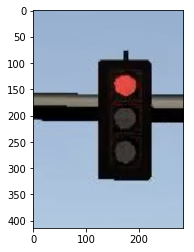

1/1 [==============================] - 0s
[1]


/Users/rainerbareiss/Developer/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in true_divide


In [41]:
my_sample = 'images_from_simulator/sim03.png'

# dimensions of our images
img_width, img_height = 64, 64

# show image
# show cropped image
%pylab inline
img=mpimg.imread(my_sample)
imgplot = plt.imshow(img)
plt.show()

# predicting images
img = image.load_img(my_sample, target_size=(img_width, img_height))
x = prepare_data(x)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


images = np.vstack([x])
classes = model_predict.predict_classes(images, batch_size=64)
print(classes)

In [ ]:



# predicting multiple images at once
img = image.load_img('test2.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print classes
print classes[0]
print classes[0][0]